In [84]:
import numpy as np
from sklearn.datasets import load_sample_image
from matplotlib import pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg

In [85]:
building=mpimg.imread("sample_images/grid.jpg")
building4D=np.array([building])

In [86]:
batch_size,height,width,channels=building4D.shape

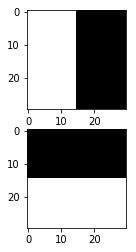

In [107]:
w=30
filters=np.zeros(shape=(w,w,channels,2),dtype=np.float32)
# row,column,chanel,depth
filters[:,0:w//2,:,0]=1 #vertical1
filters[w//2:w,:,:,1]=1 #horizontal
plt.subplot(211).imshow(filters[:,:,:,0])
plt.subplot(212).imshow(filters[:,:,:,1])

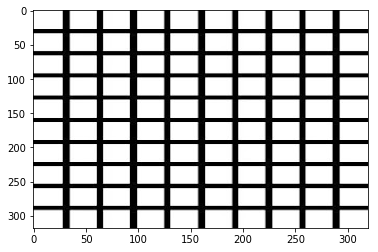

In [108]:
tf.reset_default_graph()
X=tf.placeholder(tf.float32,shape=(None,height,width,channels))
convolution=tf.nn.conv2d(X,filters,strides=[1,1,1,1],padding="SAME")

with tf.Session()as sess:
    output=sess.run(convolution,feed_dict={X:building4D})
plt.subplot(111).imshow(building,cmap="gray",aspect='auto')

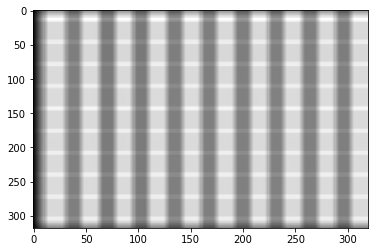

In [109]:
plt.subplot(111).imshow(output[0,:,:,0],cmap="gray",aspect='auto')

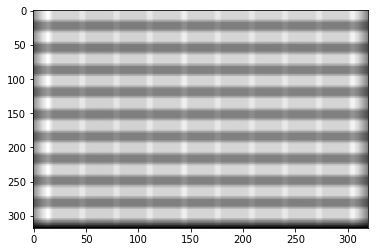

In [110]:
plt.subplot(111).imshow(output[0,:,:,1],cmap="gray",aspect='auto')

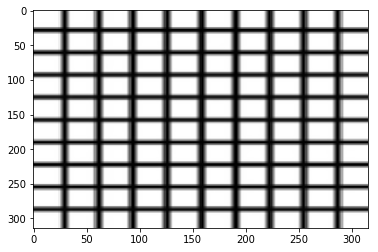

In [114]:
tf.reset_default_graph()
X=tf.placeholder(tf.float32,shape=(None,height,width,channels))
avg_pool=tf.nn.avg_pool(X,ksize=[1,5,5,1],strides=[1,1,1,1],padding="VALID")
with tf.Session()as sess:
    output=sess.run(avg_pool,feed_dict={X:building4D})
plt.subplot(111).imshow(output[0].astype(np.uint8),aspect='auto')